http://andrewgaidus.com/Spatial_Econonometric_Modeling/
https://methods.sagepub.com/dataset/howtoguide/spatial-lag-dublin-2018-python
https://pysal.org/libpysal/tutorial.html

In [177]:
import geopandas as gpd
import pysal as ps
from libpysal.weights import Queen, Rook, KNN
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.max_rows = 300

gdf = gpd.read_file('crime_gdf.shp', index='beat_num')

#gdf = gdf[gdf['beat_num'] != '1655']
#gdf.sort_values('beat_num')



In [178]:
print(gdf.shape)

(268, 15)


In [179]:
gdf[gdf.duplicated(subset='beat_num')]

,beat_num,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,y_orig,y_pred,resid,geometry


In [211]:
queen_w=ps.queen_from_shapefile('crime_gdf.shp','beat_num')
print(queen_w.weights.values())
queen_w.transform = 'r'
print(queen_w.weights.values())
#wq = ps.queen_from_array(gdf['geometry'])

dict_values([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0

In [201]:
queen_w2 = Queen.from_dataframe(gdf)
queen_w2.transform = 'r'

<Figure size 1440x1440 with 0 Axes>

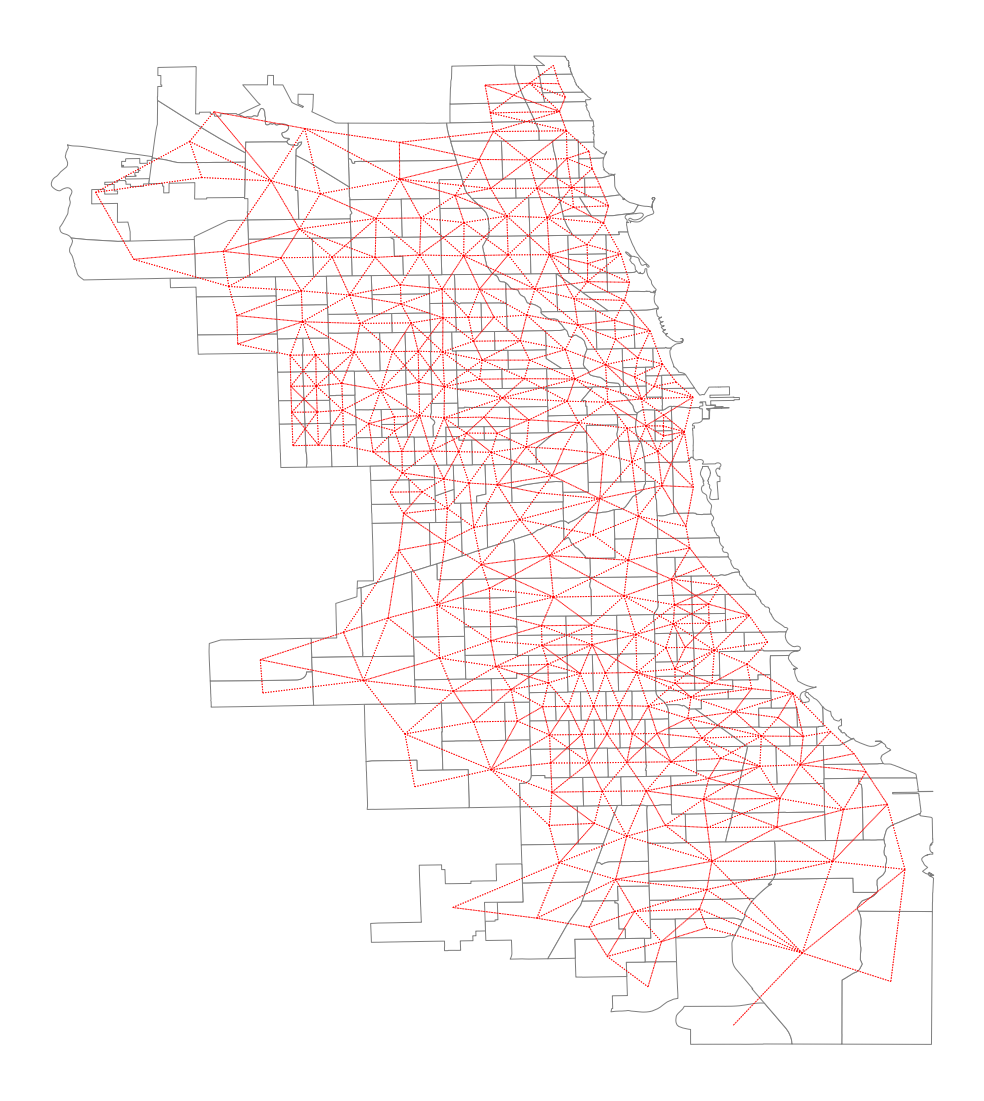

In [202]:
plt.figure(figsize=(20,20))
ax = gdf.plot(edgecolor='grey', facecolor='w')
fig,ax = queen_w2.plot(gdf, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()


In [217]:
y = gdf['y_orig'].values[:,None]
x = gdf[gdf.columns[1:11]].values

#y = gdf['y_orig'].to_numpy().reshape((len(gdf),1))
#x = gdf[gdf.columns[2:12]].to_numpy()



ols=ps.spreg.OLS(y,x,w=queen_w, spat_diag=True)
print(ols.summary)
mi = ps.Moran(ols.u, queen_w, two_tailed=False)
pd.Series(index=['Morans I','Z-Score','P-Value'],data=[mi.I, mi.z_norm, mi.p_norm])

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:         268
Mean dependent var  :     15.2820                Number of Variables   :          11
S.D. dependent var  :      2.6513                Degrees of Freedom    :         257
R-squared           :      0.6367
Adjusted R-squared  :      0.6226
Sum squared residual:     681.799                F-statistic           :     45.0459
Sigma-square        :       2.653                Prob(F-statistic)     :    6.34e-51
S.E. of regression  :       1.629                Log likelihood        :    -505.398
Sigma-square ML     :       2.544                Akaike info criterion :    1032.796
S.E of regression ML:      1.5950                Schwarz criterion     :    1072.296

-----------------------------------------------------------------------------

Morans I    0.056462
Z-Score     1.636024
P-Value     0.050917
dtype: float64

In [81]:
w_rook

In [95]:
queen_w

In [194]:
x

array([[ 4.2026083 , -1.93339637,  1.99048752, ...,  1.69878611,
        -1.1123581 , 13.13242424],
       [-0.04893941, -0.86530222, -0.39133409, ...,  1.29215033,
        -0.7013303 , 13.4183575 ],
       [-0.36682048, -1.35447919,  0.18820627, ..., -0.69623351,
        -1.49935147, 18.5599042 ],
       ...,
       [ 1.41936133,  1.05899003, -0.23901652, ...,  0.32941404,
        -0.34591371, 14.59178692],
       [ 0.12097067, -0.94242881, -0.06394065, ...,  1.05044073,
        -0.27912395, 16.61990825],
       [-1.75281175,  0.49662462,  2.3810739 , ..., -0.60512441,
         0.43310833, 10.99142648]])

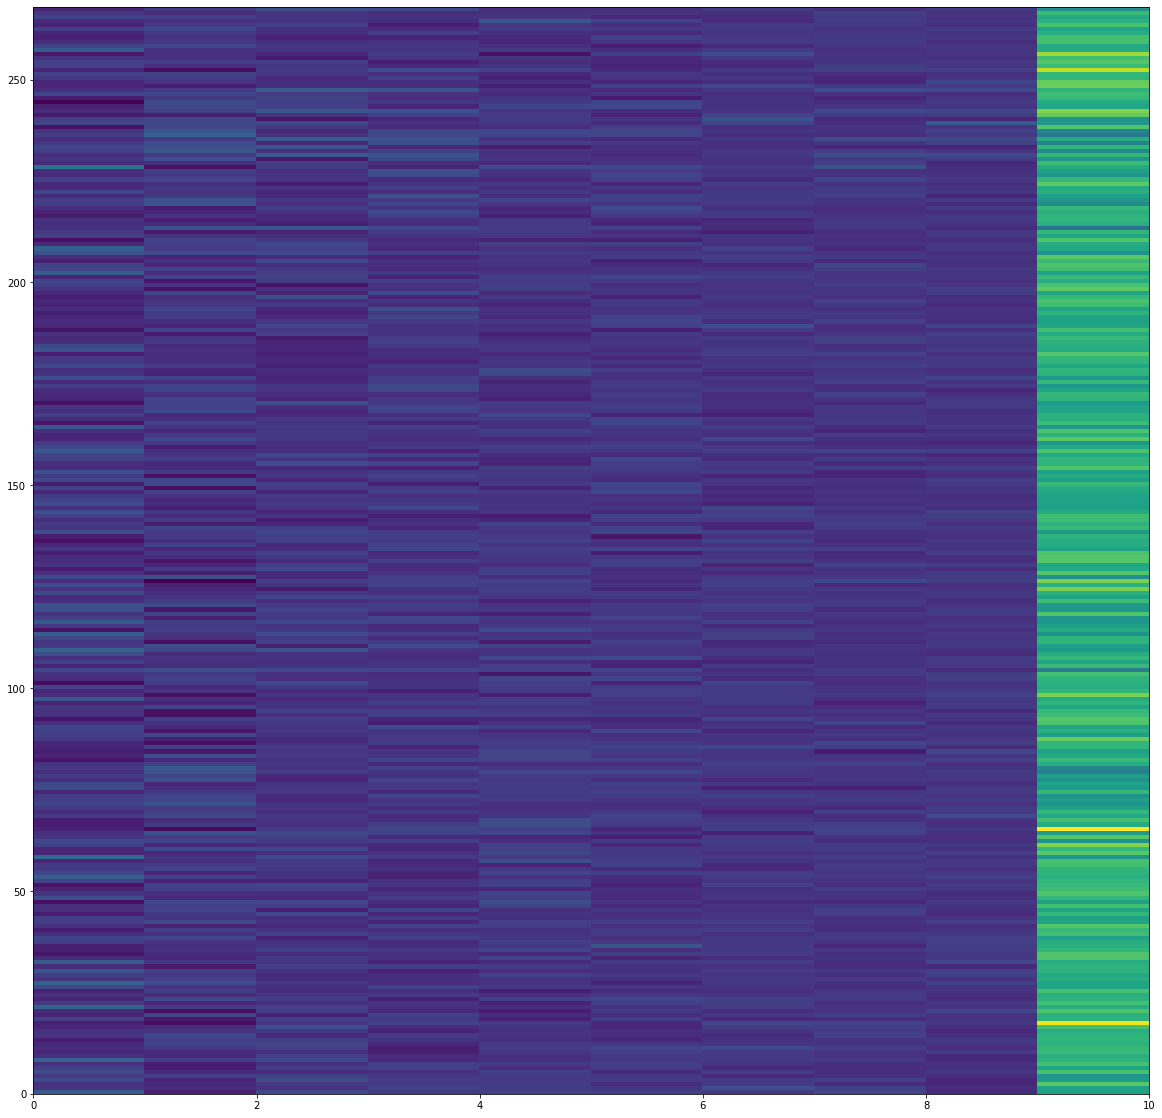

In [213]:
plt.pcolor(x)

In [216]:
gdf.columns[1:11]

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], dtype='object')